In [20]:
import pandas as pd
data=pd.read_csv('../data/Table1_new.csv')
data['age']=2019-data['Year_of_publication']+1
data['citation_per_year']=data['Number_of_Citations']/data['age']
data.head(3)

,Unnamed: 0,Year_of_publication,Aligner,URL,Citation,read_length,max_read_length_tested,Title,Number_of_Citations,Indexing,...,fix length seed,Variable length seed (hybrid seeding),spaced seed,chain_of_seeds,Application,email - first author,email - last author,Verified,age,citation_per_year
0,43.0,2011,Bismark,https://www.bioinformatics.babraham.ac.uk/proj...,Krueger et al. ‎2011,Ultra-short,50,Bismark: a flexible aligner and methylation ca...,1550,BWT-FM,...,Y,N,N,N,BS-Seq,felix.krueger@bbsrc.ac.uk,NaN,NaN,9,172.222222
1,16.0,2009,BRAT,http://compbio.cs.ucr.edu/brat/,Harris et al. 2009,Ultra-short,26,BRAT: bisulfite-treated reads analysis tool,64,Hashing,...,Y,N,N,N,BS-Seq,elenah@cs.ucr.edu,stefano.lonardi@ucr.edu,NaN,11,5.818182
2,54.0,2012,BRAT-BW,http://compbio.cs.ucr.edu/brat/,Harris et al. 2012,Ultra-short,62,BRAT-BW: efficient and accurate mapping of bis...,70,BWT-FM,...,N,Y,N,N,BS-Seq,elenayharris@gmail.com,stefano.lonardi@ucr.edu,NaN,8,8.750000


In [53]:
rt = pd.read_csv('../data/compare.tools.runtime.hours.csv')
idx_rt = pd.read_csv('../data/compare.tools.index.csv')
mem = pd.read_csv('../data/compare.tools.memory.csv')

In [51]:
data_year = data.loc[:,['Year_of_publication', 'Aligner', 'Application', 'Indexing', 'Global_Positioning', 'Pairwise_alignment_2']]
data_year.loc[:,'aligner_lower'] = data_year['Aligner'].str.lower()
rt.loc[:,'tools_lower'] = rt['Tools'].str.lower()
rtyear = pd.merge(rt, data_year, left_on='tools_lower', right_on='aligner_lower', how='inner')
rtyear.loc[:,'average_runtime'] = rtyear.iloc[:,1:11].mean(axis=1)
rtyear_summ = rtyear.loc[:,['Tools', 'Year_of_publication', 'average_runtime', 'Application', 'Indexing', 'Global_Positioning', 'Pairwise_alignment_2']]
rtyear_summ.sort_values(by=['Year_of_publication'], inplace=True)
for i in range(0,16):
    rtyear.loc[i,'year_split'] = 'Before 2012' if rtyear.loc[i,'Year_of_publication'] < 2012 else '2012 and later'
rtyear_new = pd.melt(rtyear, id_vars = ['Tools', 'year_split', 'Application', 'Indexing', 'Global_Positioning', 'Pairwise_alignment_2'], 
        value_vars = ['ERR009309', 'ERR013127', 'ERR013138', 'ERR045708', 'ERR050158', 'ERR162843', 'ERR181410',
                     'ERR183377', 'SRR061640', 'SRR360549'], value_name = 'runtime')
rtyear_new.head()

,Tools,year_split,Application,Indexing,Global_Positioning,Pairwise_alignment_2,variable,runtime
0,Bowtie2,2012 and later,DNA,BWT-FM,Backward Search,Local & Global,ERR009309,2.364914
1,Bowtie,Before 2012,DNA,BWT-FM,Backward Search,Hamming Distance,ERR009309,3.358317
2,BWA,Before 2012,DNA,BWT-FM,Backward Search,Local,ERR009309,4.048227
3,ERNE,2012 and later,DNA,Hashing,Seed,Hamming Distance,ERR009309,2.066056
4,gsnap,Before 2012,DNA,Hashing,Seed,Non-DP Heuristic,ERR009309,18.782465


In [66]:
mem.loc[:,'tools_lower'] = mem['Tools'].str.lower()
memyear = pd.merge(mem, data_year, left_on='tools_lower', right_on='aligner_lower', how='inner')
for i in range(0,16):
    memyear.loc[i,'year_split'] = 'Before 2012' if memyear.loc[i,'Year_of_publication'] < 2012 else '2012 and later'
memyear_new = pd.melt(memyear, id_vars = ['Tools', 'year_split', 'Application', 'Indexing', 'Global_Positioning', 'Pairwise_alignment_2'], 
        value_vars = ['ERR009309', 'ERR013127', 'ERR013138', 'ERR045708', 'ERR050158', 'ERR162843', 'ERR181410',
                     'ERR183377', 'SRR061640', 'SRR360549'], value_name = 'memory')
memyear_new.head()

,Tools,year_split,Application,Indexing,Global_Positioning,Pairwise_alignment_2,variable,memory
0,Bowtie2,2012 and later,DNA,BWT-FM,Backward Search,Local & Global,ERR009309,3.580
1,Bowtie,Before 2012,DNA,BWT-FM,Backward Search,Hamming Distance,ERR009309,3.194
2,BWA,Before 2012,DNA,BWT-FM,Backward Search,Local,ERR009309,5.564
3,ERNE,2012 and later,DNA,Hashing,Seed,Hamming Distance,ERR009309,4.841
4,gsnap,Before 2012,DNA,Hashing,Seed,Non-DP Heuristic,ERR009309,28.060


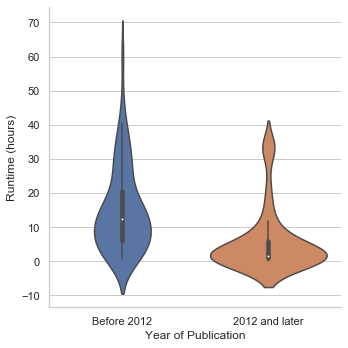

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style='whitegrid')
ax = sns.catplot(data = rtyear_new, x = 'year_split', y = 'runtime', kind = 'violin', 
                 order = ['Before 2012', '2012 and later'])
ax.set(xlabel = 'Year of Publication', ylabel = 'Runtime (hours)')
#plt.show()
plt.savefig('../figures/Runtime_by_YoP.png')

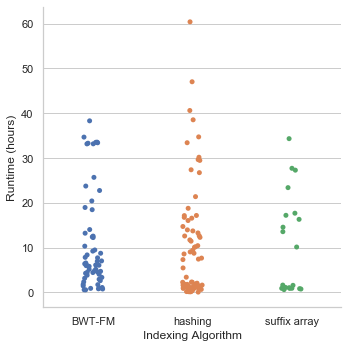

In [13]:
ax = sns.catplot(data = rtyear_new, x = 'Indexing', y = 'runtime')
ax.set(xlabel = 'Indexing Algorithm', ylabel = 'Runtime (hours)')
plt.show()

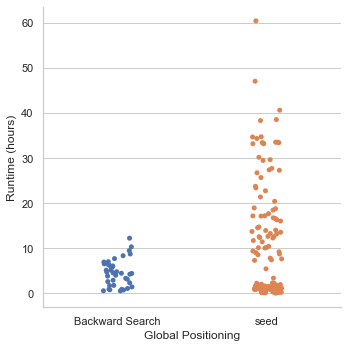

In [14]:
ax = sns.catplot(data = rtyear_new, x = 'Global_Positioning', y = 'runtime')
ax.set(xlabel = 'Global Positioning', ylabel = 'Runtime (hours)')
plt.show()

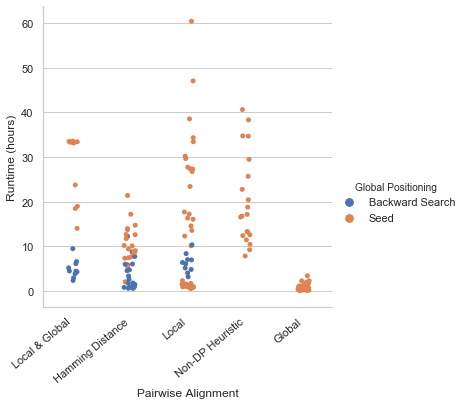

In [29]:
ax = sns.catplot(data = rtyear_new, x = 'Pairwise_alignment_2', y = 'runtime', hue = 'Global_Positioning')
ax.set(xlabel = 'Pairwise Alignment', ylabel = 'Runtime (hours)')
ax._legend.set_title('Global Positioning')
ax.set_xticklabels(rotation=40, ha="right")
plt.show()

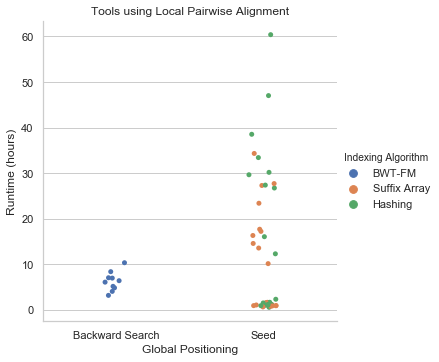

In [38]:
ax = sns.catplot(data = rtyear_new.loc[rtyear_new['Pairwise_alignment_2'] == 'Local'], x = 'Global_Positioning', 
                y = 'runtime', hue = 'Indexing')
ax._legend.set_title('Indexing Algorithm')
ax.set(xlabel = 'Global Positioning', ylabel = 'Runtime (hours)', title = 'Tools using Local Pairwise Alignment')

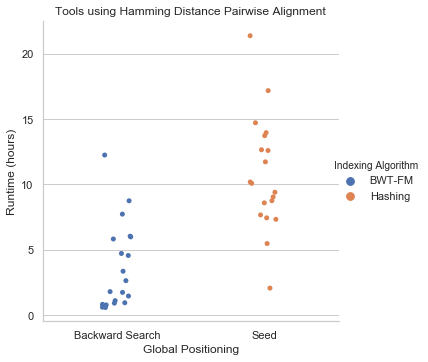

In [39]:
ax = sns.catplot(data = rtyear_new.loc[rtyear_new['Pairwise_alignment_2'] == 'Hamming Distance'],
                 x = 'Global_Positioning', y = 'runtime', hue = 'Indexing')
ax._legend.set_title('Indexing Algorithm')

ax.set(xlabel = 'Global Positioning', ylabel = 'Runtime (hours)', title = 'Tools using Hamming Distance Pairwise Alignment')

In [34]:
test = rtyear_new.groupby(['Global_Positioning','Pairwise_alignment_2']).mean()
#test = rtyear_new.pivot(index = 'global_alignment_algorithm', columns = 'local', values = 'runtime')
test = test.unstack(level = -1)
test

runtime                                             \
Pairwise_alignment_2    Global Hamming Distance      Local Local & Global   
Global_Positioning                                                          
Backward Search            NaN         3.630463   6.239311       4.973137   
Seed                  1.080196        10.739059  13.668802      27.529830   

                                       
Pairwise_alignment_2 Non-DP Heuristic  
Global_Positioning                     
Backward Search                   NaN  
Seed                         20.31755

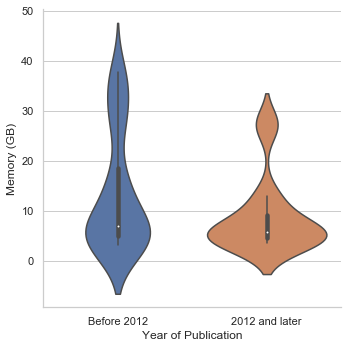

In [63]:
ax = sns.catplot(data = memyear_new, x = 'year_split', y = 'memory', kind = 'violin', 
                 order = ['Before 2012', '2012 and later'])
ax.set(xlabel = 'Year of Publication', ylabel = 'Memory (GB)')

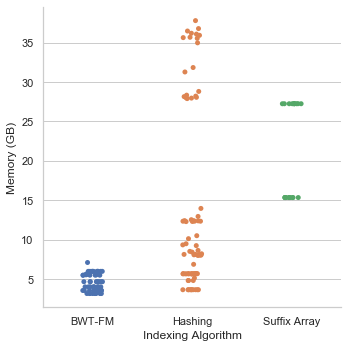

In [64]:
ax = sns.catplot(data = memyear_new, x = 'Indexing', y = 'memory')
ax.set(xlabel = 'Indexing Algorithm', ylabel = 'Memory (GB)')
plt.show()

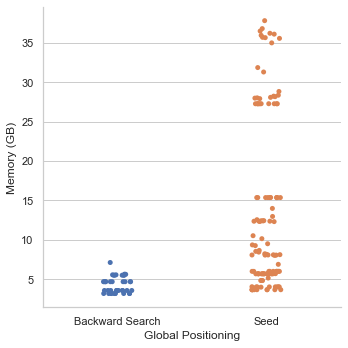

In [68]:
ax = sns.catplot(data = memyear_new, x = 'Global_Positioning', y = 'memory')
ax.set(xlabel = 'Global Positioning', ylabel = 'Memory (GB)')
plt.show()

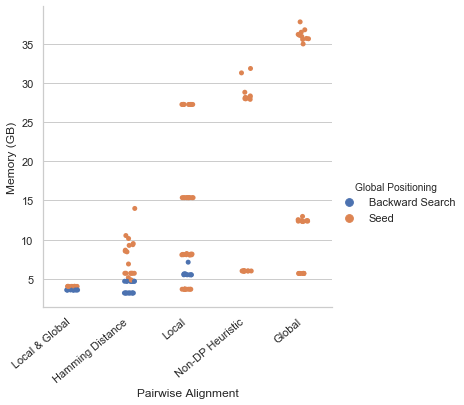

In [75]:
ax = sns.catplot(data = memyear_new, x = 'Pairwise_alignment_2', y = 'memory', hue = 'Global_Positioning')
ax.set(xlabel = 'Pairwise Alignment', ylabel = 'Memory (GB)')
ax._legend.set_title('Global Positioning')
ax.set_xticklabels(rotation=40, ha="right")
plt.show()

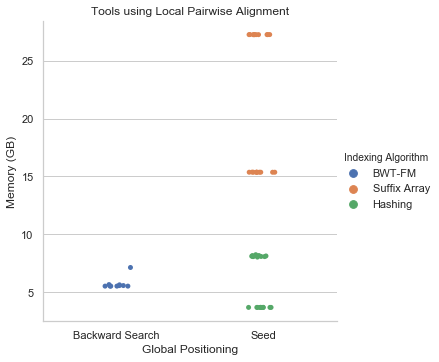

In [70]:
ax = sns.catplot(data = memyear_new.loc[memyear_new['Pairwise_alignment_2'] == 'Local'], x = 'Global_Positioning', 
                y = 'memory', hue = 'Indexing')
ax._legend.set_title('Indexing Algorithm')
ax.set(xlabel = 'Global Positioning', ylabel = 'Memory (GB)', title = 'Tools using Local Pairwise Alignment')

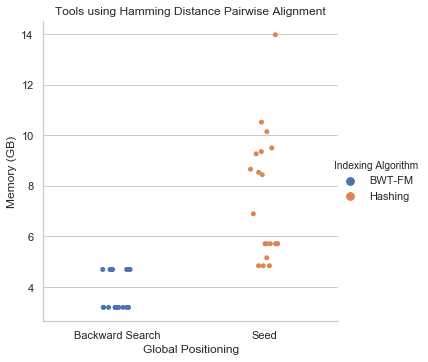

In [71]:
ax = sns.catplot(data = memyear_new.loc[memyear_new['Pairwise_alignment_2'] == 'Hamming Distance'],
                 x = 'Global_Positioning', y = 'memory', hue = 'Indexing')
ax._legend.set_title('Indexing Algorithm')

ax.set(xlabel = 'Global Positioning', ylabel = 'Memory (GB)', title = 'Tools using Hamming Distance Pairwise Alignment')


In [72]:
test = memyear_new.groupby(['Global_Positioning','Pairwise_alignment_2']).mean()
#test = rtyear_new.pivot(index = 'global_alignment_algorithm', columns = 'local', values = 'runtime')
test = test.unstack(level = -1)
test

memory                                           \
Pairwise_alignment_2   Global Hamming Distance    Local Local & Global   
Global_Positioning                                                       
Backward Search           NaN          3.94405   5.7110         3.5799   
Seed                  18.0795          7.46355  13.5985         4.0304   

                                       
Pairwise_alignment_2 Non-DP Heuristic  
Global_Positioning                     
Backward Search                   NaN  
Seed                          17.4293

In [47]:
data_index = data[['Aligner', 'Indexing']]
data_index.loc[:,'aligner_lower'] = data_index.loc[:,'Aligner'].str.lower()
idx_rt.loc[:,'tools_lower'] = idx_rt.loc[:,'Tools'].str.lower()
rtidx = pd.merge(idx_rt, data_index, left_on='tools_lower', right_on='aligner_lower', how='inner')
rtidx = rtidx.dropna()
t = pd.DatetimeIndex(rtidx.loc[:,'Runtime'])
rtidx.loc[:,'Runtime (minutes)'] = t.hour*60 + t.minute
rtidx

,Tools,Runtime,Virtual Mem (G),tools_lower,Aligner,Indexing,aligner_lower,Runtime (minutes)
0,bowtie2,1:53:39,5.398,bowtie2,Bowtie2,BWT-FM,bowtie2,113
1,bowtie,1:42:21,5.395,bowtie,Bowtie,BWT-FM,bowtie,102
2,bwa,1:10:43,4.448,bwa,BWA,BWT-FM,bwa,70
3,erne,6:52:25,12.956,erne,ERNE,Hashing,erne,412
4,gsnap,1:08:32,19.561,gsnap,GSNAP,Hashing,gsnap,68
5,hisat2,1:07:14,5.394,hisat2,HISAT2,BWT-FM,hisat2,67
6,last,0:55:16,28.148,last,LAST,Suffix Array,last,55
7,lordfast,1:04:37,5.423,lordfast,lordFAST,Hashing,lordfast,64
8,MOSAIK,0:01:09,6.688,mosaik,MOSAIK,Hashing,mosaik,1
9,segemehl,1:26:45,57.773,segemehl,segemehl,Suffix Array,segemehl,86


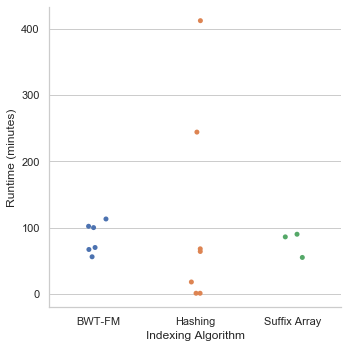

In [48]:
ax = sns.catplot(data = rtidx, x = 'Indexing', y = 'Runtime (minutes)')
ax.set(xlabel = 'Indexing Algorithm')
plt.savefig('../figures/Indexing_by_time.png')

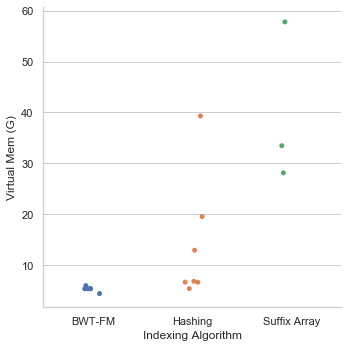

In [49]:
import seaborn as sns

ax = sns.catplot(data = rtidx, x = 'Indexing', y = 'Virtual Mem (G)')
ax.set(xlabel = 'Indexing Algorithm')
plt.savefig('../figures/Indexing_by_mem.png')

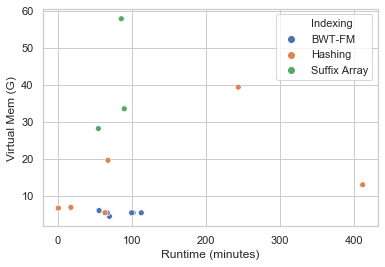

In [50]:
ax = sns.scatterplot(data=rtidx, x = 'Runtime (minutes)', y = 'Virtual Mem (G)', 
                    hue = 'Indexing')
ax.set(xlabel = 'Runtime (minutes)')
plt.savefig('../figures/Indexing_mem_vs_runtime.png')
#plt.show()

In [44]:
tools = data.loc[:,['Aligner','Indexing','Global_Positioning','Pairwise_alignment_2',
                   'Pairwise_alignment (DP-based?)','fix length seed','Variable length seed (hybrid seeding)',
                   'spaced seed','chain_of_seeds']]
tools.head()

,Aligner,Indexing,Global_Positioning,Pairwise_alignment_2,Pairwise_alignment (DP-based?),fix length seed,Variable length seed (hybrid seeding),spaced seed,chain_of_seeds
0,Bismark,BWT-FM,Backward Search,Hamming Distance,N,Y,N,N,N
1,BRAT,Hashing,Seed,Hamming Distance,N,Y,N,N,N
2,BRAT-BW,BWT-FM,Backward Search,Hamming Distance,N,N,Y,N,N
3,BS-Seeker,BWT-FM,Backward Search,Hamming Distance,N,Y,N,N,N
4,BS-Seeker2,BWT-FM,Backward Search,Local & Global,Y,Y,N,N,N


In [81]:
tools.loc[:,'aligner_lower'] = data_year['Aligner'].str.lower()
seed_info = pd.merge(rtyear, tools, left_on='tools_lower', right_on='aligner_lower', how='inner')
seed_info = seed_info.loc[:,['Tools','ERR009309','ERR013127','ERR013138','ERR045708','ERR050158','ERR162843',
                             'ERR181410','ERR183377','SRR061640','SRR360549','Pairwise_alignment (DP-based?)',
                             'fix length seed','Variable length seed (hybrid seeding)',
                             'spaced seed','chain_of_seeds']]
seed_info

,Tools,ERR009309,ERR013127,ERR013138,ERR045708,ERR050158,ERR162843,ERR181410,ERR183377,SRR061640,SRR360549,Pairwise_alignment (DP-based?),fix length seed,Variable length seed (hybrid seeding),spaced seed,chain_of_seeds
0,Bowtie2,2.364914,4.442126,6.125343,9.481851,4.480202,6.579199,5.183426,4.279699,2.942086,3.852528,Y,Y,N,N,N
1,Bowtie,3.358317,5.825385,8.749844,12.251327,6.041617,7.729104,5.987389,4.563028,1.797393,4.718723,N,Y,N,N,N
2,BWA,4.048227,6.964193,8.374950,10.337639,5.155173,7.040740,6.394736,4.827655,3.171607,6.078192,Y,N,Y,N,N
3,ERNE,2.066056,5.475683,9.406134,13.734103,8.755687,NaN,11.730733,8.590035,7.333813,7.445680,N,Y,N,N,N
4,gsnap,18.782465,29.469896,40.606409,34.717148,11.450009,17.150793,16.579589,13.286443,10.444190,16.757750,N,Y,N,N,N
5,hisat2,0.582257,2.636554,1.459196,1.739013,0.778033,1.107651,0.944994,0.820202,0.604172,0.915061,N,Y,N,N,N
6,last,10.140177,16.316454,27.292700,27.709176,23.393876,34.322943,17.217662,14.567814,13.563960,17.689251,Y,N,Y,N,N
7,lordfast,0.082570,0.168354,0.239144,0.371073,0.184324,0.261441,0.223871,0.196660,0.154788,0.203453,Y,Y,N,N,N
8,minimap2,0.955566,1.781175,3.408856,2.273320,1.625731,2.278983,1.980141,1.624609,1.086941,1.648935,Y,Y,N,N,N
9,rmap,7.669205,10.087773,14.721393,21.384636,13.965002,17.182582,12.655798,9.048157,10.189939,12.599718,N,Y,N,N,N


In [82]:
seed_all = pd.melt(seed_info, id_vars = ['Tools', 'Pairwise_alignment (DP-based?)',
                             'fix length seed','Variable length seed (hybrid seeding)',
                             'spaced seed','chain_of_seeds'], 
        value_vars = ['ERR009309', 'ERR013127', 'ERR013138', 'ERR045708', 'ERR050158', 'ERR162843', 'ERR181410',
                     'ERR183377', 'SRR061640', 'SRR360549'], value_name = 'runtime')
seed_all.head()

,Tools,Pairwise_alignment (DP-based?),fix length seed,Variable length seed (hybrid seeding),spaced seed,chain_of_seeds,variable,runtime
0,Bowtie2,Y,Y,N,N,N,ERR009309,2.364914
1,Bowtie,N,Y,N,N,N,ERR009309,3.358317
2,BWA,Y,N,Y,N,N,ERR009309,4.048227
3,ERNE,N,Y,N,N,N,ERR009309,2.066056
4,gsnap,N,Y,N,N,N,ERR009309,18.782465


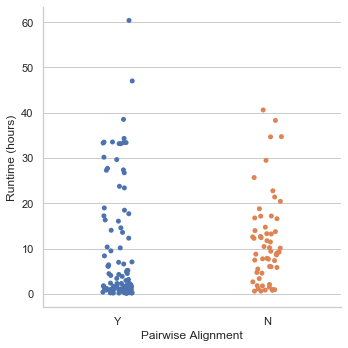

In [57]:
ax = sns.catplot(data = seed_all, x = 'Pairwise_alignment (DP-based?)', y = 'runtime')
ax.set(xlabel = 'Pairwise Alignment', ylabel = 'Runtime (hours)')
plt.show()

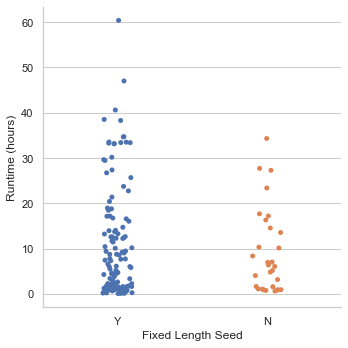

In [58]:
ax = sns.catplot(data = seed_all, x = 'fix length seed', y = 'runtime')
ax.set(xlabel = 'Fixed Length Seed', ylabel = 'Runtime (hours)')
plt.show()

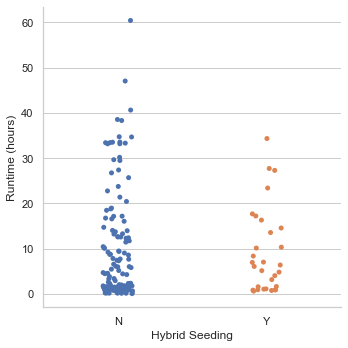

In [86]:
ax = sns.catplot(data = seed_all, x = 'Variable length seed (hybrid seeding)', y = 'runtime')
ax.set(xlabel = 'Hybrid Seeding', ylabel = 'Runtime (hours)')
plt.show()

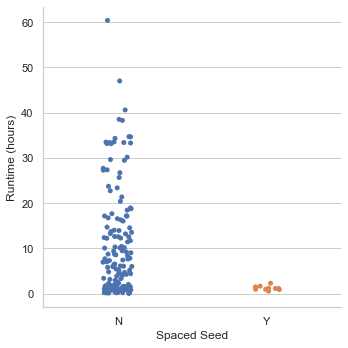

In [85]:
ax = sns.catplot(data = seed_all, x = 'spaced seed', y = 'runtime')
ax.set(xlabel = 'Spaced Seed', ylabel = 'Runtime (hours)')
plt.show()

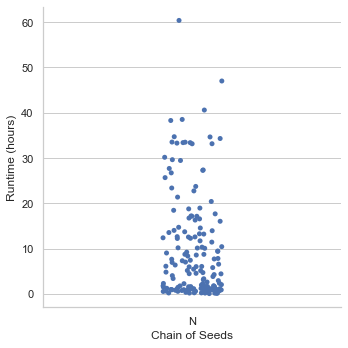

In [62]:
ax = sns.catplot(data = seed_all, x = 'chain_of_seeds', y = 'runtime')
ax.set(xlabel = 'Chain of Seeds', ylabel = 'Runtime (hours)')
plt.show()

In [78]:
seed_mem = pd.merge(memyear, tools, left_on='tools_lower', right_on='aligner_lower', how='inner')
seed_mem = seed_info.loc[:,['Tools','ERR009309','ERR013127','ERR013138','ERR045708','ERR050158','ERR162843',
                             'ERR181410','ERR183377','SRR061640','SRR360549','Pairwise_alignment (DP-based?)',
                             'fix length seed','Variable length seed (hybrid seeding)',
                             'spaced seed','chain_of_seeds']]
seed_mem

,Tools,ERR009309,ERR013127,ERR013138,ERR045708,ERR050158,ERR162843,ERR181410,ERR183377,SRR061640,SRR360549,Pairwise_alignment (DP-based?),fix length seed,Variable length seed (hybrid seeding),spaced seed,chain_of_seeds
0,Bowtie2,2.364914,4.442126,6.125343,9.481851,4.480202,6.579199,5.183426,4.279699,2.942086,3.852528,Y,Y,N,N,N
1,Bowtie,3.358317,5.825385,8.749844,12.251327,6.041617,7.729104,5.987389,4.563028,1.797393,4.718723,N,Y,N,N,N
2,BWA,4.048227,6.964193,8.374950,10.337639,5.155173,7.040740,6.394736,4.827655,3.171607,6.078192,Y,N,Y,N,N
3,ERNE,2.066056,5.475683,9.406134,13.734103,8.755687,NaN,11.730733,8.590035,7.333813,7.445680,N,Y,N,N,N
4,gsnap,18.782465,29.469896,40.606409,34.717148,11.450009,17.150793,16.579589,13.286443,10.444190,16.757750,N,Y,N,N,N
5,hisat2,0.582257,2.636554,1.459196,1.739013,0.778033,1.107651,0.944994,0.820202,0.604172,0.915061,N,Y,N,N,N
6,last,10.140177,16.316454,27.292700,27.709176,23.393876,34.322943,17.217662,14.567814,13.563960,17.689251,Y,N,Y,N,N
7,lordfast,0.082570,0.168354,0.239144,0.371073,0.184324,0.261441,0.223871,0.196660,0.154788,0.203453,Y,Y,N,N,N
8,minimap2,0.955566,1.781175,3.408856,2.273320,1.625731,2.278983,1.980141,1.624609,1.086941,1.648935,Y,Y,N,N,N
9,rmap,7.669205,10.087773,14.721393,21.384636,13.965002,17.182582,12.655798,9.048157,10.189939,12.599718,N,Y,N,N,N


In [83]:
mem_all = pd.melt(seed_mem, id_vars = ['Tools', 'Pairwise_alignment (DP-based?)',
                             'fix length seed','Variable length seed (hybrid seeding)',
                             'spaced seed','chain_of_seeds'], 
        value_vars = ['ERR009309', 'ERR013127', 'ERR013138', 'ERR045708', 'ERR050158', 'ERR162843', 'ERR181410',
                     'ERR183377', 'SRR061640', 'SRR360549'], value_name = 'memory')
mem_all.head()

,Tools,Pairwise_alignment (DP-based?),fix length seed,Variable length seed (hybrid seeding),spaced seed,chain_of_seeds,variable,memory
0,Bowtie2,Y,Y,N,N,N,ERR009309,2.364914
1,Bowtie,N,Y,N,N,N,ERR009309,3.358317
2,BWA,Y,N,Y,N,N,ERR009309,4.048227
3,ERNE,N,Y,N,N,N,ERR009309,2.066056
4,gsnap,N,Y,N,N,N,ERR009309,18.782465


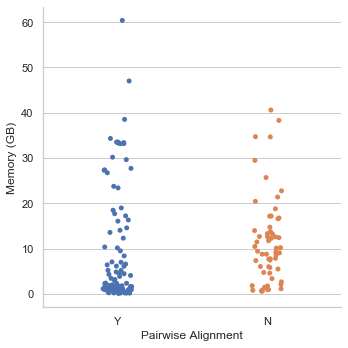

In [84]:
ax = sns.catplot(data = mem_all, x = 'Pairwise_alignment (DP-based?)', y = 'memory')
ax.set(xlabel = 'Pairwise Alignment', ylabel = 'Memory (GB)')
plt.show()

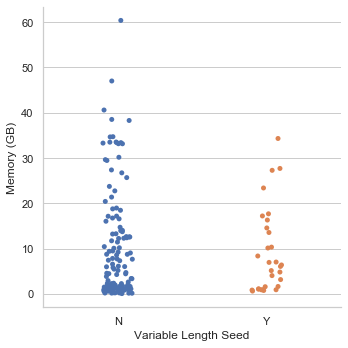

In [87]:
ax = sns.catplot(data = mem_all, x = 'Variable length seed (hybrid seeding)', y = 'memory')
ax.set(xlabel = 'Variable Length Seed', ylabel = 'Memory (GB)')
plt.show()

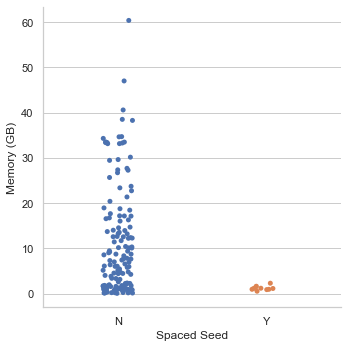

In [88]:
ax = sns.catplot(data = mem_all, x = 'spaced seed', y = 'memory')
ax.set(xlabel = 'Spaced Seed', ylabel = 'Memory (GB)')
plt.show()